In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [2]:
def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, rotation=rotation, label_type=location)
    axes.set_ylabel("")
    axes.set_xlabel("")
    axes.set_yticklabels(())

In [3]:
rfr = RandomForestRegressor(random_state=42)
abr = AdaBoostRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
etr = ExtraTreesRegressor(random_state=42)
svr = SVR()
lnr = LinearRegression()
xgbr = XGBRegressor(random_state=42)
lgbr = LGBMRegressor(random_state=42)
dtr = DecisionTreeRegressor(random_state=42)
hr = HistGradientBoostingRegressor(random_state=42)
kr = KernelRidge()
rr = Ridge(random_state=42)
lsr = Lasso(random_state=42)
er = ElasticNet(random_state=42)
lar = Lars()
llar = LassoLars()
pr = PassiveAggressiveRegressor(random_state=42)
tr = TheilSenRegressor(random_state=42)
rhr = RANSACRegressor(random_state=42)
br = BayesianRidge()
knr = KNeighborsRegressor()
mlp = MLPRegressor(random_state=42, max_iter=1000) # Increased max_iter for stability
gpr = GaussianProcessRegressor(random_state=42)
qdr = QuantileRegressor()
huber = HuberRegressor()

In [4]:
models_r = [
    rfr, abr, gbr, etr, lnr, svr, xgbr, lgbr, dtr, hr, kr, rr, lsr, er, 
    lar, llar, pr, tr, rhr, br, knr, mlp, gpr, qdr, huber
]

In [5]:
names_r = [
    "Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
    "Linear Regression", "Support Vector Machine", "XGBoost", "LightGBM",
    "Decision Tree", "Hist Gradient Boost", "Kernel Ridge", "Ridge",
    "Lasso", "Elastic Net", "LARS", "Lasso LARS",
    "Passive Aggressive", "Theil Sen", "RANSAC", "Bayesian Ridge",
    "K-Neighbors", "MLP Neural Net", "Gaussian Process", "Quantile Regressor",
    "Huber Regressor"]

In [6]:
def bar_labels(ax):
    """Helper function to add labels to the bars in the bar plot."""
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(
            f"{height}",
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

In [7]:
def training_regression():
    # 🚨 CRITICAL FIX: Ensure models_r and names_r are the same length.
    # Since they are not passed as arguments, we assume they are global.
    global models_r, names_r, x_train, y_train, x_test, y_test
    
    # 1. Initialize lists for current run
    r2s, mses = [], []

    # 2. Iterate and Evaluate Models
    for i in models_r:
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        
        # Calculate scores and append
        # Note: We'll keep your original r2_score calculation (pred, y_test)
        # but the standard is r2_score(y_test, pred).
        r2s.append(r2_score(pred, y_test) * 100)
        mses.append(mean_squared_error(pred, y_test))

    # 3. Create the results DataFrame (FIXED: Lengths of r2s/mses should now match names_r)
    if len(r2s) != len(names_r):
        print(f"\n❌ ERROR: Results list length ({len(r2s)}) does not match Names list length ({len(names_r)}).")
        print("Please check if 'models_r' and 'names_r' were defined correctly and have the same number of items.")
        return # Stop execution to prevent the DataFrame error
        
    dd = pd.DataFrame({"r2": r2s, "mse": mses}, index=names_r)

    # --- Print the Table ---
    print("\n--- Model Performance Metrics ---")
    
    # Format for display
    dd_display = dd.copy()
    dd_display["r2"] = dd_display["r2"].round(2).astype(str) + " %"
    dd_display["mse"] = dd_display["mse"].round(4)
    dd_display = dd_display.sort_values("r2", ascending=False)
    
    print(dd_display)
    print("-----------------------------------")
    
    # 4. Start Plotting
    fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
    
    # Plot R2 Scores
    dd_r2 = dd.sort_values("r2", ascending=False)
    dd_r2["r2"].round(2).plot(kind="bar", ax=axes[0], title="R2 Scores (Higher is Better)")
    bar_labels(axes[0])
    axes[0].set_ylabel("")
    axes[0].set_xlabel("")
    axes[0].tick_params(axis='y', length=0) # Remove y ticks
    axes[0].set_yticklabels(())

    # Plot MSE Scores
    dd_mse = dd.sort_values("mse", ascending=True)
    dd_mse["mse"].round(4).plot(kind="bar", ax=axes[1], title="MSE Scores (Lower is Better)")
    bar_labels(axes[1])
    axes[1].set_ylabel("")
    axes[1].set_xlabel("")
    axes[1].tick_params(axis='y', length=0) # Remove y ticks
    axes[1].set_yticklabels(())

    plt.tight_layout()
    plt.show()

In [8]:
df = pd.read_csv("Final_Marks_data.csv")

In [9]:
df

,Student_ID,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
0,S1000,84,30,36,7,3,72
1,S1001,91,24,38,6,3,56
2,S1002,73,29,26,7,3,56
3,S1003,80,36,35,7,3,74
4,S1004,84,31,37,8,3,66
...,...,...,...,...,...,...,...
1995,S2995,82,31,28,6,2,52
1996,S2996,78,38,27,7,2,57
1997,S2997,78,30,33,9,2,61
1998,S2998,82,29,40,8,3,59


In [10]:
df.drop("Student_ID", axis=1, inplace=True)

In [11]:
df

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
0,84,30,36,7,3,72
1,91,24,38,6,3,56
2,73,29,26,7,3,56
3,80,36,35,7,3,74
4,84,31,37,8,3,66
...,...,...,...,...,...,...
1995,82,31,28,6,2,52
1996,78,38,27,7,2,57
1997,78,30,33,9,2,61
1998,82,29,40,8,3,59


In [12]:
df.dropna(inplace=True)

In [13]:
df

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
0,84,30,36,7,3,72
1,91,24,38,6,3,56
2,73,29,26,7,3,56
3,80,36,35,7,3,74
4,84,31,37,8,3,66
...,...,...,...,...,...,...
1995,82,31,28,6,2,52
1996,78,38,27,7,2,57
1997,78,30,33,9,2,61
1998,82,29,40,8,3,59


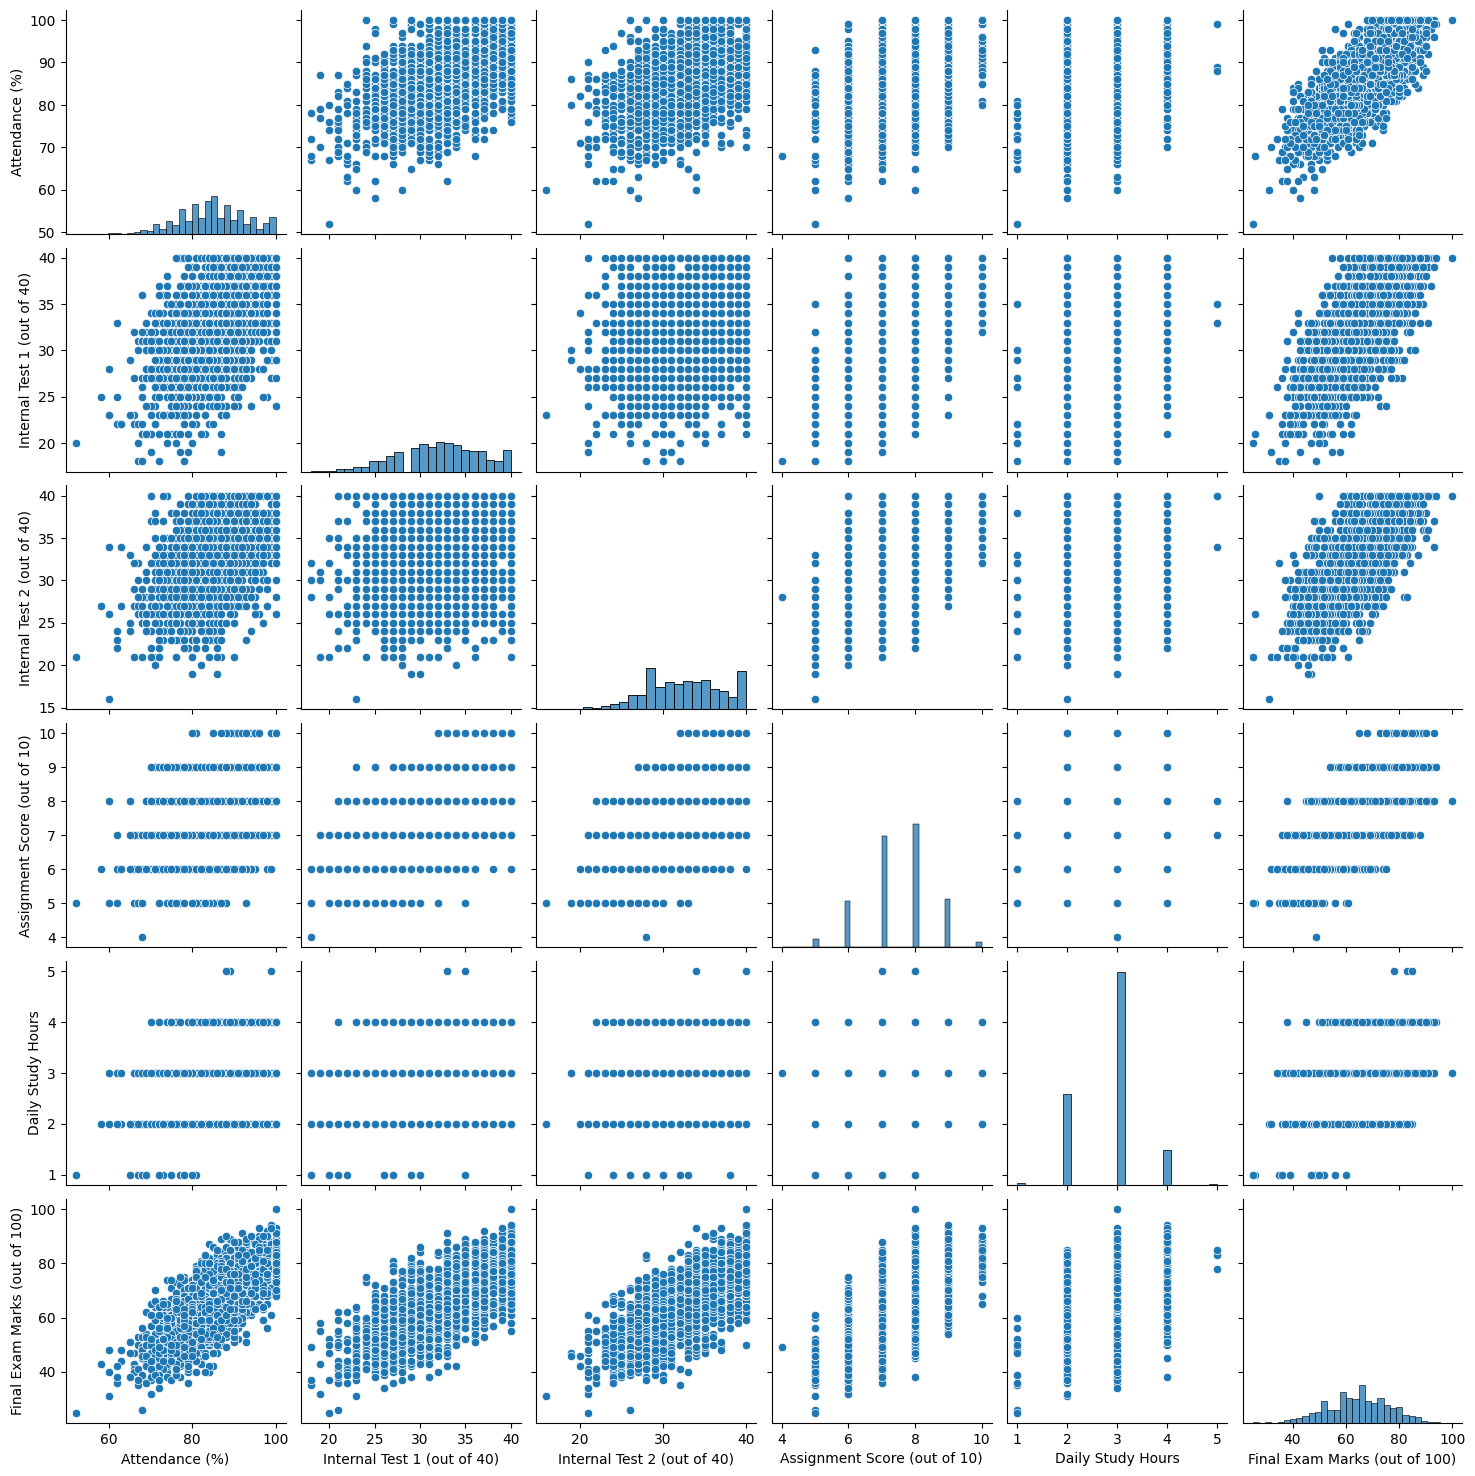

In [14]:
sns.pairplot(df, vars=df.columns)
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 5
[LightGBM] [Info] Start training from score 64.853750

--- Model Performance Metrics ---
                              r2       mse
Linear Regression        79.49 %   21.3254
LARS                     79.49 %   21.3254
Ridge                    79.48 %   21.3260
Bayesian Ridge           79.46 %   21.3314
Huber Regressor          79.29 %   21.3849
Gradient Boosting        78.04 %   22.9061
Theil Sen                77.24 %   21.7104
RANSAC                   76.19 %   22.9190
LightGBM                 75.34 %   25.9967
Hist Gradient Boost      75.34 %   25.9985
Elastic Net              75.14 %   23.7873
Lasso LARS               73.39 %   25.2932
Las

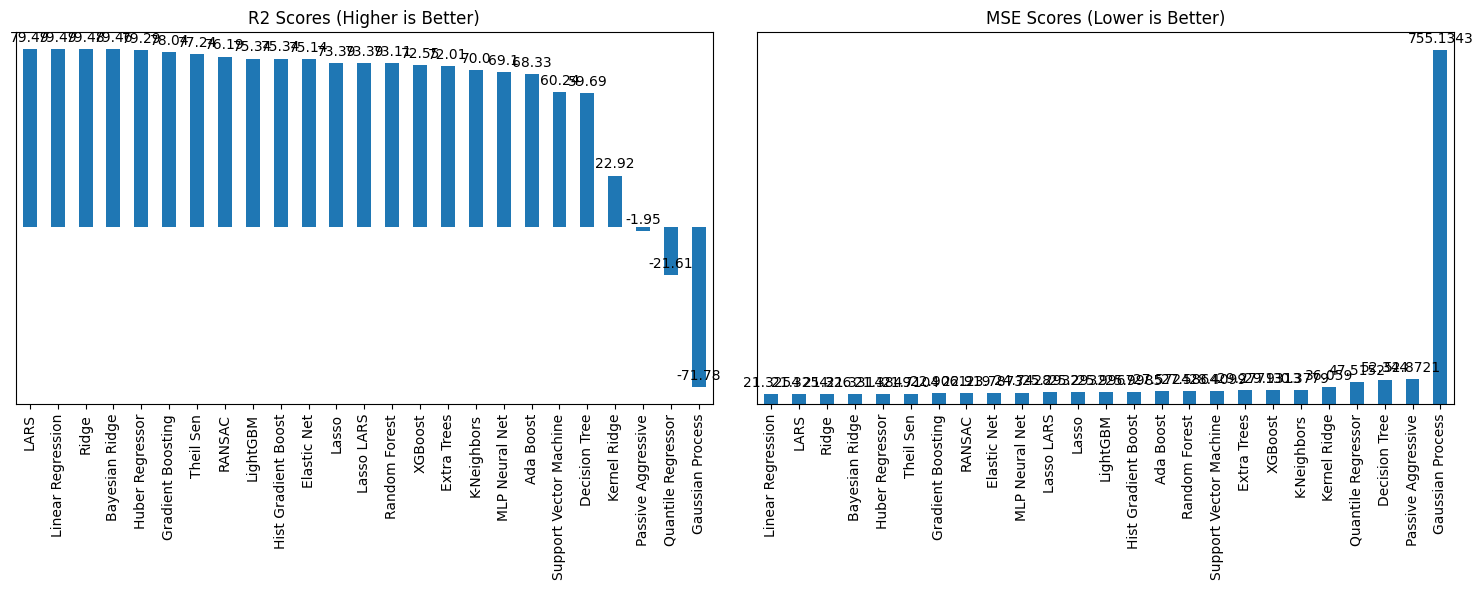

In [15]:
x = df.iloc[:, :-1].values # Setting up inputs
y = df.iloc[:, -1].values # Setting up output

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

training_regression()